# Start

In [82]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import random
from scipy import stats
from statsmodels.stats.proportion import proportions_ztest

In [83]:
df = pd.read_csv('AB_Test_Results.csv')
df.head()

,USER_ID,VARIANT_NAME,REVENUE
0,737,variant,0.0
1,2423,control,0.0
2,9411,control,0.0
3,7311,control,0.0
4,6174,variant,0.0


In [84]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 3 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   USER_ID       10000 non-null  int64  
 1   VARIANT_NAME  10000 non-null  object 
 2   REVENUE       10000 non-null  float64
dtypes: float64(1), int64(1), object(1)
memory usage: 234.5+ KB


In [85]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
USER_ID,10000.0,4981.080200,2890.590115,2.0,2468.75,4962.0,7511.5,10000.00
REVENUE,10000.0,0.099447,2.318529,0.0,0.00,0.0,0.0,196.01


In [86]:
df['VARIANT_NAME'].value_counts()

VARIANT_NAME
variant    5016
control    4984
Name: count, dtype: int64

<Axes: xlabel='VARIANT_NAME', ylabel='REVENUE'>

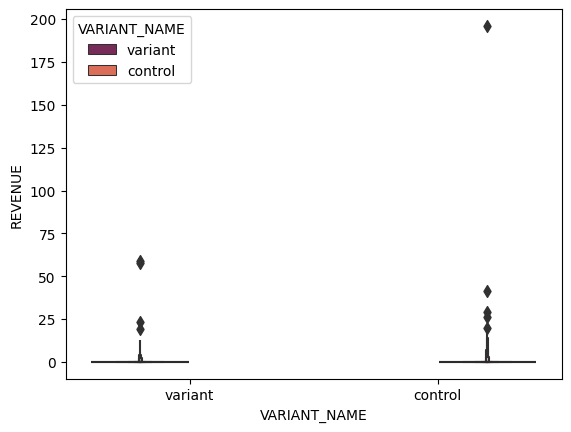

In [87]:
sns.boxenplot(
  df[['VARIANT_NAME', 'REVENUE']], 
  x = "VARIANT_NAME",
  y = 'REVENUE',
  hue="VARIANT_NAME", 
  palette='rocket'
)

# Removing duplicates

We remove the users that are both Variant and Control.

In [88]:
# df[df.duplicated()]

In [89]:
# #  remove USER_ID who have two groups

# duplicates = (df.groupby("USER_ID")["VARIANT_NAME"].nunique() == 1)
# duplicates = duplicates[duplicates]

# # USER_ID_nunique data

# df = df[df["USER_ID"].isin(duplicates.index)]

In [90]:
df.groupby("USER_ID")["VARIANT_NAME"].nunique()

USER_ID
2        1
3        2
4        1
5        1
6        1
        ..
9993     1
9995     1
9996     2
9998     1
10000    2
Name: VARIANT_NAME, Length: 6324, dtype: int64

In [91]:
df['USER_ID'].value_counts()

USER_ID
5652    6
8359    6
668     6
9101    6
4879    6
       ..
5455    1
1399    1
6967    1
3156    1
9468    1
Name: count, Length: 6324, dtype: int64

In [92]:
print(df[df['USER_ID']==2])
print(df[df['USER_ID']==5652])
print(df[df['USER_ID']==9995])

      USER_ID VARIANT_NAME  REVENUE
2406        2      control      0.0
3479        2      control      0.0
7076        2      control      0.0
      USER_ID VARIANT_NAME  REVENUE
595      5652      control      0.0
778      5652      control      0.0
2880     5652      control      0.0
6327     5652      control      0.0
7248     5652      control      0.0
7972     5652      control      0.0
      USER_ID VARIANT_NAME  REVENUE
2749     9995      variant      0.0
5673     9995      variant      0.0


In [93]:
# df.drop_duplicates(inplace=True)

In [94]:
# rows_to_keep = df['USER_ID'].value_counts()==1
# rows_to_keep = rows_to_keep[rows_to_keep]
# df = df[df['USER_ID'].isin(rows_to_keep.index)]

rows_to_keep = (df.groupby("USER_ID")["VARIANT_NAME"].nunique() == 1)
rows_to_keep = rows_to_keep[rows_to_keep]
df = df[df['USER_ID'].isin(rows_to_keep.index)]

In [95]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
USER_ID,6070.0,4983.664086,2897.990118,2.0,2472.25,4950.0,7501.0,9998.00
REVENUE,6070.0,0.107064,2.673501,0.0,0.00,0.0,0.0,196.01


In [96]:
df['VARIANT_NAME'].value_counts()

VARIANT_NAME
variant    3044
control    3026
Name: count, dtype: int64

<Axes: xlabel='VARIANT_NAME', ylabel='REVENUE'>

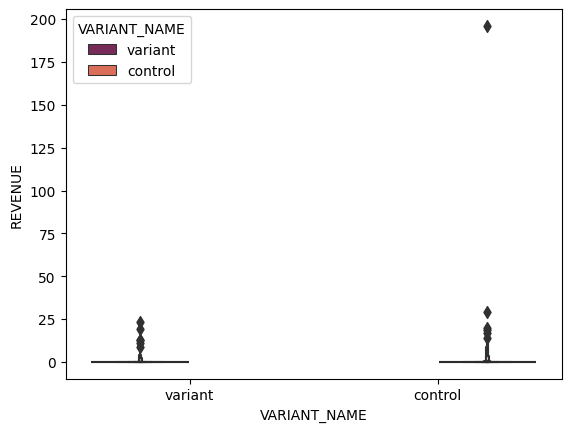

In [97]:
sns.boxenplot(
  df[['VARIANT_NAME', 'REVENUE']], 
  x = "VARIANT_NAME",
  y = 'REVENUE',
  hue="VARIANT_NAME", 
  palette='rocket'
)

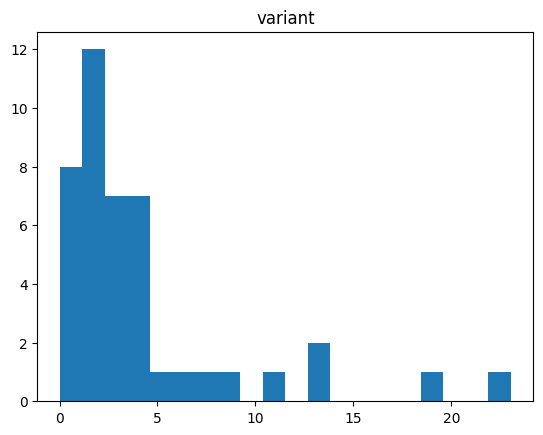

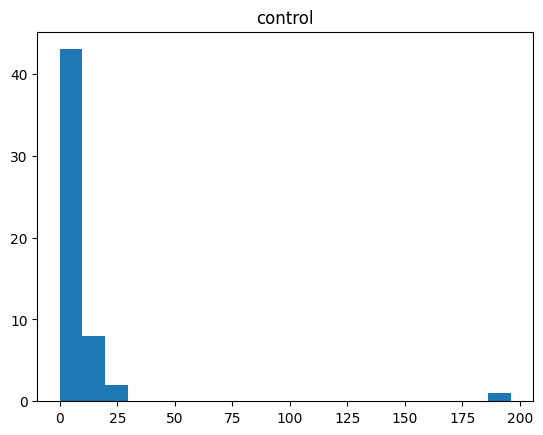

In [98]:
plt.hist(df[(df['VARIANT_NAME'] == 'variant') & (df['REVENUE'] != 0)]['REVENUE'], bins =20)
plt.title('variant')
plt.show()

plt.hist(df[(df['VARIANT_NAME'] == 'control') & (df['REVENUE'] != 0)]['REVENUE'], bins =20)
plt.title('control')
plt.show()

# Removing outliers

In [99]:
# index_to_drop = df[(df['REVENUE'] >= 10) & (df['VARIANT_NAME'] == 'variant')].index
# df.drop(index=index_to_drop, inplace= True)
index_to_drop =  df[(df['REVENUE'] >= 25)].index
df.drop(index=index_to_drop, inplace= True)

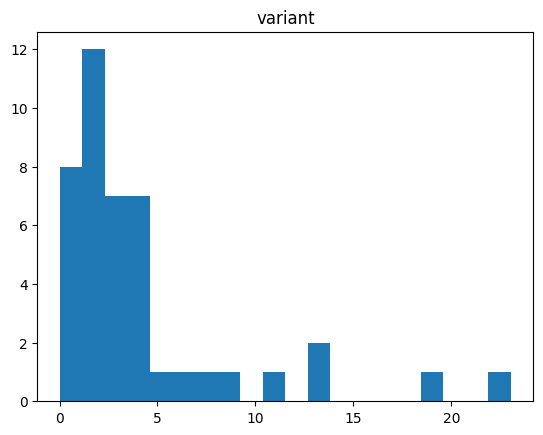

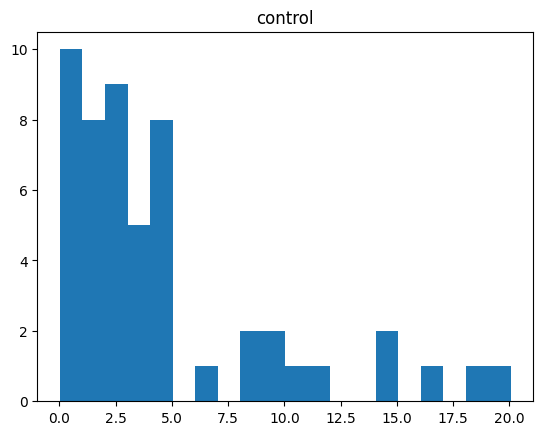

In [100]:
plt.hist(df[(df['VARIANT_NAME'] == 'variant') & (df['REVENUE'] != 0)]['REVENUE'], bins =20)
plt.title('variant')
plt.show()

plt.hist(df[(df['VARIANT_NAME'] == 'control') & (df['REVENUE'] != 0)]['REVENUE'], bins =20)
plt.title('control')
plt.show()

<Axes: xlabel='VARIANT_NAME', ylabel='REVENUE'>

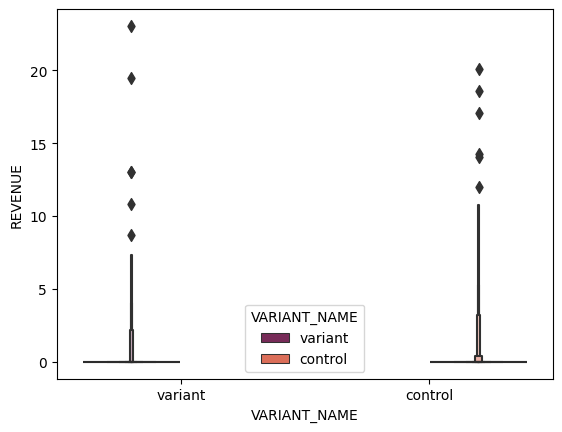

In [101]:
sns.boxenplot(
  df[['VARIANT_NAME', 'REVENUE']], 
  x = "VARIANT_NAME",
  y = 'REVENUE',
  hue="VARIANT_NAME", 
  palette='rocket'
)

In [102]:
df['BOUGHT'] = np.where(df['REVENUE'] == 0, 0, 1)

In [103]:
df['BOUGHT'].value_counts()

BOUGHT
0    5973
1      95
Name: count, dtype: int64

In [104]:
df.groupby(['VARIANT_NAME', 'BOUGHT'])['BOUGHT'].count()

VARIANT_NAME  BOUGHT
control       0         2972
              1           52
variant       0         3001
              1           43
Name: BOUGHT, dtype: int64

In [105]:
df.reset_index(drop=True, inplace=True)

# New dataframes

In [106]:
df_userid_revenue = pd.DataFrame(df.groupby(['USER_ID', 'VARIANT_NAME'])['REVENUE'].sum()).reset_index()
df_userid_revenue

,USER_ID,VARIANT_NAME,REVENUE
0,2,control,0.0
1,4,variant,0.0
2,5,variant,0.0
3,6,variant,0.0
4,9,variant,0.0
...,...,...,...
4777,9990,variant,0.0
4778,9992,control,0.0
4779,9993,control,0.0
4780,9995,variant,0.0


In [107]:
df_userid_interaction = df[['USER_ID', 'VARIANT_NAME', 'REVENUE']].groupby(['USER_ID', 'VARIANT_NAME']).agg(INTERACTIONS=('REVENUE', 'count')).reset_index()
df_userid_interaction

,USER_ID,VARIANT_NAME,INTERACTIONS
0,2,control,3
1,4,variant,1
2,5,variant,1
3,6,variant,1
4,9,variant,1
...,...,...,...
4777,9990,variant,1
4778,9992,control,1
4779,9993,control,1
4780,9995,variant,2


In [108]:
df_userid_bought = df[['USER_ID', 'VARIANT_NAME', 'BOUGHT']].groupby(['USER_ID', 'VARIANT_NAME']).agg(TOTAL_BOUGHTS=('BOUGHT', 'sum')).reset_index()
df_userid_bought

,USER_ID,VARIANT_NAME,TOTAL_BOUGHTS
0,2,control,0
1,4,variant,0
2,5,variant,0
3,6,variant,0
4,9,variant,0
...,...,...,...
4777,9990,variant,0
4778,9992,control,0
4779,9993,control,0
4780,9995,variant,0


In [109]:
# pd.concat([df_userid_revenue, df_userid_interaction, df_userid_bought], axis=1)
df_grouped_users = pd.merge(df_userid_revenue, df_userid_interaction, on=['USER_ID', 'VARIANT_NAME']).merge(df_userid_bought, on=['USER_ID', 'VARIANT_NAME'])
df_grouped_users

,USER_ID,VARIANT_NAME,REVENUE,INTERACTIONS,TOTAL_BOUGHTS
0,2,control,0.0,3,0
1,4,variant,0.0,1,0
2,5,variant,0.0,1,0
3,6,variant,0.0,1,0
4,9,variant,0.0,1,0
...,...,...,...,...,...
4777,9990,variant,0.0,1,0
4778,9992,control,0.0,1,0
4779,9993,control,0.0,1,0
4780,9995,variant,0.0,2,0


In [110]:
df_grouped_users['NO_BOUGHTS'] = df_grouped_users['INTERACTIONS'] - df_grouped_users['TOTAL_BOUGHTS']
df_grouped_users['BOUGHT'] = np.where(df_grouped_users['REVENUE'] == 0, 0, 1)
df_grouped_users

,USER_ID,VARIANT_NAME,REVENUE,INTERACTIONS,TOTAL_BOUGHTS,NO_BOUGHTS,BOUGHT
0,2,control,0.0,3,0,3,0
1,4,variant,0.0,1,0,1,0
2,5,variant,0.0,1,0,1,0
3,6,variant,0.0,1,0,1,0
4,9,variant,0.0,1,0,1,0
...,...,...,...,...,...,...,...
4777,9990,variant,0.0,1,0,1,0
4778,9992,control,0.0,1,0,1,0
4779,9993,control,0.0,1,0,1,0
4780,9995,variant,0.0,2,0,2,0


<Axes: xlabel='VARIANT_NAME', ylabel='REVENUE'>

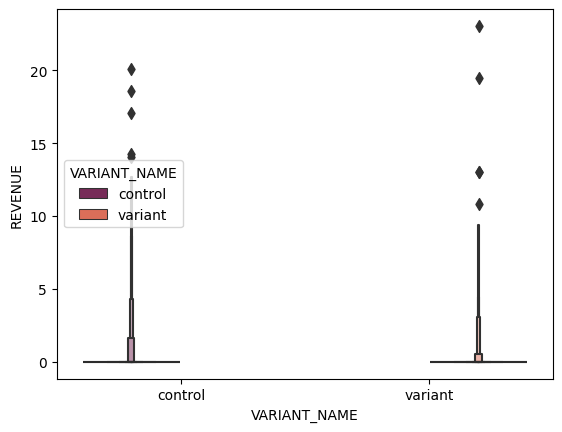

In [111]:
sns.boxenplot(
  df_grouped_users[['VARIANT_NAME', 'REVENUE']], 
  x = "VARIANT_NAME",
  y = 'REVENUE',
  hue="VARIANT_NAME", 
  palette='rocket'
)

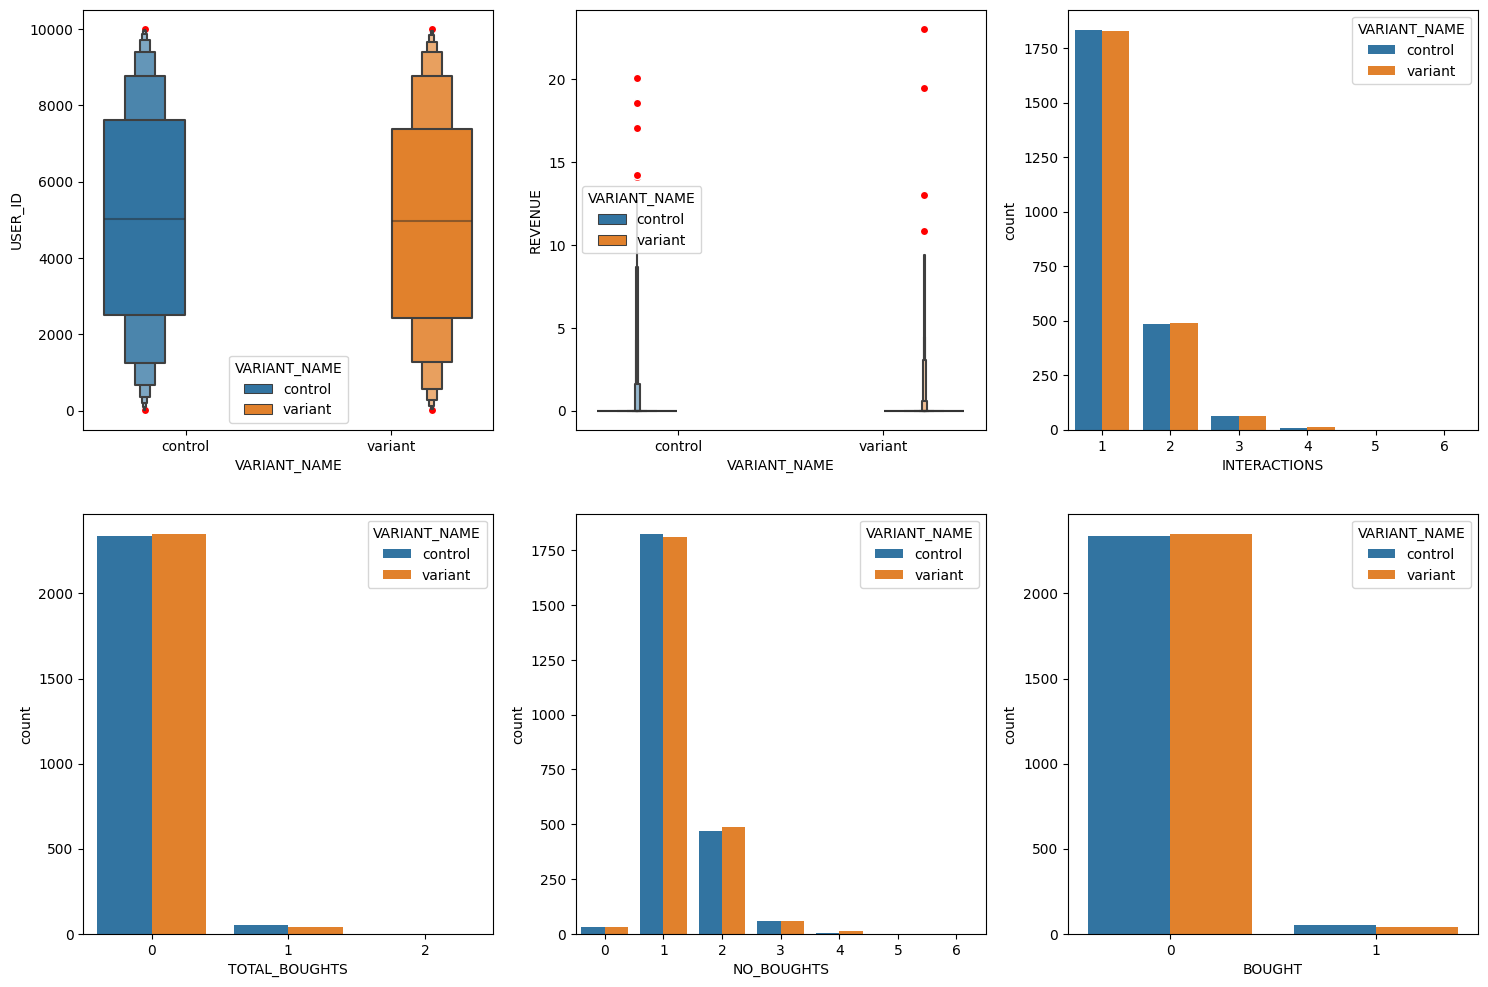

In [112]:
df_grouped_users_num = df_grouped_users.select_dtypes(include='number')
n_cols =  3
red_circle_boxen = dict(color='red', marker='o', edgecolors='white')
# n_rows = int(np.ceil(((df_grouped_users_num.shape[1]-1) / n_cols)))
n_rows = int(np.ceil(((df_grouped_users_num.shape[1]) / n_cols)))
fig, axes = plt.subplots(nrows=n_rows, ncols=n_cols,figsize=(18, (n_rows*6)))
for i, column in enumerate(df_grouped_users_num.columns):
  if(len(df_grouped_users_num[column].unique()) <= 24): # "categorical" data
    sns.countplot(
      df_grouped_users[[column, 'VARIANT_NAME']],
      x = column,
      hue="VARIANT_NAME", 
      ax=axes[i//n_cols,i%n_cols],
    )
  else: # if it's not categorical data...

    sns.boxenplot(
      df_grouped_users[[column, 'VARIANT_NAME']],
      x = "VARIANT_NAME",
      hue="VARIANT_NAME", 
      y = column,
      ax=axes[i//n_cols,i%n_cols],
      flier_kws=red_circle_boxen
    )

The graphs allow us to suspect that there is no difference between Variant and Control among the different variables.

# A/B Testing

General assumptions:
- Randomness: The samples are random subsets of larger population
- Independence of observations: Each observation is independent
- Large sample size: The sample is big enough to mitigate uncertainty, so that the Central Limit Theorem applies

Test assumptions:

- T-test for difference in means:
    - Large sample size: 
    
        - At least 30 observations in each sample. 
        
            n1 >= 30, n2 >= 30

- Mann-Whitney U rank test:
    - The data must be independent.

    - The data must be ordinal or capable of being ordered from least to greatest.

    - It is not necessary to assume that the samples are normally distributed or that they come from normal populations. However, for the test to compare medians, both samples must have the same type of distribution (variance, skewness, etc.).

Equality of variance between groups (homoscedasticity).
- Permutation test for difference in means
- Levene test for equal variances between samples
- Z-test for proportions:
    - Large sample size: 

        - Number of successes in each sample is equal or greater than 10

            n1 * p_hat1 >= 10
            n2 * p_hat2 >= 10
            
        - Number of failures in each sample is equal or greater than 10
        
            n1 * (1-p_hat1) >= 10
            n2 * (1-p_hat2) >= 10

- Permutation test for proportions
- Chi-Square test of Independence:
    - Large sample size:

        - The number of successes in each group is equal or greater than 5

            ni * p_hat_i >= 5 for all values of i

        - The number of failures in each group is equal or greater than 5

            ni * (1-p_hat_i) >= 5 for all values of i

- Fisher's Exact test

In [134]:
df_results = pd.DataFrame(columns=['test_for', 'test_type', 'H0', 'H1', 'pvalue', 'results'])

## A/B Testing on Revenue (difference in means)

In [113]:
mean_control = df_grouped_users[df_grouped_users['VARIANT_NAME'] == 'control']['REVENUE'].mean()
mean_variant = df_grouped_users[df_grouped_users['VARIANT_NAME'] == 'variant']['REVENUE'].mean()
print(f'mean_control: {mean_control:.4f}')
print(f'mean_variant: {mean_variant:.4f}')
print(f'mean_control - mean_variant: {mean_control - mean_variant:.4f}')

mean_control: 0.1026
mean_variant: 0.0749
mean_control - mean_variant: 0.0277


Based on the calculations for the mean of each group, we make the hypothesis that the variant group generates less revenue than the control group on average.

Null Hypothesis (H0) = No difference on revenue mean between the Control and Variant groups . (mean_control - mean_variant = 0)

Alternative Hypothesis (H1) = Variant group generates less revenue on average / Difference between control and variant revenue means is positive. (mean_control - mean_variant > 0)

### Permutation test

p-value: 0.1570


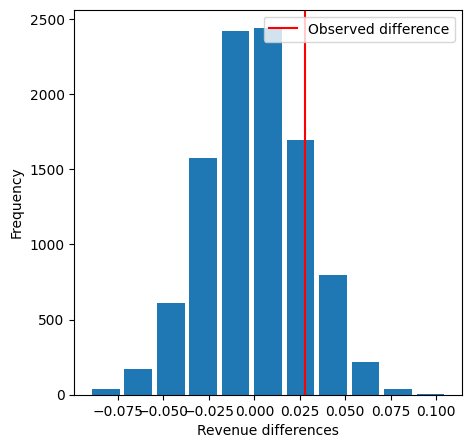

In [136]:
def statistic(x, y, axis):
    return np.mean(x, axis=axis) - np.mean(y, axis=axis)

permutation_results = stats.permutation_test(
    (df_grouped_users[df_grouped_users['VARIANT_NAME'] == 'control']['REVENUE'], 
     df_grouped_users[df_grouped_users['VARIANT_NAME'] == 'variant']['REVENUE']),
     statistic,
     vectorized=True,
     alternative='greater'
    )
print(f'p-value: {permutation_results.pvalue:.4f}')

df_results['test_for'] = "Difference in Revenue means"
df_results['test_type'] = "Permutation Test"
df_results['H0'] = "No difference on Revenue means"
df_results['H1'] = "Mean Revenue on Variant group is lower"
df_results['pvalue'] = permutation_results.pvalue
df_results['results'] = "Fail to reject the Null Hypothesis. Seems like there is no difference between Control and Variant groups on Revenue means"

fig, ax = plt.subplots(figsize=(5, 5))
ax.hist(permutation_results.null_distribution, bins=11, rwidth=0.85)
ax.axvline(x = mean_control - mean_variant, color='red', label='Observed difference')
ax.set_xlabel('Revenue differences')
ax.set_ylabel('Frequency')

ax.legend();
plt.show()

### T-Test

#### Levene test (for equal variances)

Determining if the variances of the samples are equal will help us decide which test are appropriate for the t-test. If variances are equal, a standard  independent 2 sample t-test should be performed, otherwise, Welch’s t-test should be performed.

In [115]:
levene_results = stats.levene(
    df_grouped_users[df_grouped_users['VARIANT_NAME'] == 'control']['REVENUE'],
    df_grouped_users[df_grouped_users['VARIANT_NAME'] == 'variant']['REVENUE']
)
print(f'p-value: {levene_results.pvalue:.4f}')

p-value: 0.3030


With a p value of 0.30 we failed to reject the null hypothesis that the samples are from populations with equal variances. We will perform a standard independet t-test.

In [137]:
# df_grouped_users[df_grouped_users['VARIANT_NAME'] == 'control']['REVENUE']
# df_grouped_users[df_grouped_users['VARIANT_NAME'] == 'variant']['REVENUE']

ttest_results = stats.ttest_ind(
    df_grouped_users[df_grouped_users['VARIANT_NAME'] == 'control']['REVENUE'], 
    df_grouped_users[df_grouped_users['VARIANT_NAME'] == 'variant']['REVENUE'],
    equal_var=True,
    alternative='greater'
)

df_results['test_for'] = "Difference in Revenue means"
df_results['test_type'] = "T-Test"
df_results['H0'] = "No difference on Revenue means"
df_results['H1'] = "Mean Revenue on Variant group is lower"
df_results['pvalue'] = ttest_results.pvalue
df_results['results'] = "Fail to reject the Null Hypothesis. Seems like there is no difference between Control and Variant groups on Revenue means"

print(f'p-value: {ttest_results.pvalue:.4f}')

p-value: 0.1515


### Mann-Whitney U rank test

Sometimes is ambiguous to correctly know when the condition of normality is met to perform a t-test, as there are situations where the samples are big enough but at the same time are extremely skewed to apply the central limit theorem. The data we have is a reflect of that situation. For such cases, it is convenient to perform non-parametric test. We will use the Mann-Whitney U rank test for this purpose.

In [138]:
mannwhitneyu_results = stats.mannwhitneyu(
    df_grouped_users[df_grouped_users['VARIANT_NAME'] == 'control']['REVENUE'], 
    df_grouped_users[df_grouped_users['VARIANT_NAME'] == 'variant']['REVENUE'],
    alternative='greater'
)

df_results['test_for'] = "Difference in Revenue means"
df_results['test_type'] = "Mann-Whitney U rank Test"
df_results['H0'] = "No difference on Revenue means"
df_results['H1'] = "Mean Revenue on Variant group is lower"
df_results['pvalue'] = mannwhitneyu_results.pvalue
df_results['results'] = "Fail to reject the Null Hypothesis. Seems like there is no difference between Control and Variant groups on Revenue means"


print(f'p-value: {mannwhitneyu_results.pvalue:.4f}')

p-value: 0.1457


## A/B Testing on Boughts (Proportions)

For proportion calculations, we will consider individuals who have generated at least one sale as 'SALE' (this has been calculated previously). 

For 'NO_SALE' we will count the number of individuals who have never generated a sale.

In [118]:
df_contingency_pt1 = df_grouped_users.loc[(df_grouped_users['BOUGHT'] == 0), ['BOUGHT', 'VARIANT_NAME']].groupby('VARIANT_NAME').count()
df_contingency_pt1.rename(columns={'BOUGHT': 'NO_BOUGHT'}, inplace=True)

df_contingency_pt2 = df_grouped_users[['BOUGHT', 'VARIANT_NAME']].groupby('VARIANT_NAME').sum()
df_contingency = pd.concat([df_contingency_pt1, df_contingency_pt2], axis=1)
df_contingency

,NO_BOUGHT,BOUGHT
VARIANT_NAME,,
control,2337,52
variant,2351,42


In [119]:
control_proportion = df_contingency.loc['control', 'BOUGHT'] / df_contingency.loc['control'].sum()
variant_proportion = df_contingency.loc['variant', 'BOUGHT'] / df_contingency.loc['variant'].sum()
observed_difference = control_proportion - variant_proportion

print(f'Control Proportion: {control_proportion:.4f}')
print(f'Variant Proportion: {variant_proportion:.4f}')
print(f'Observed Difference: {observed_difference:.4f}')

Control Proportion: 0.0218
Variant Proportion: 0.0176
Observed Difference: 0.0042


Based on the calculations for the proportion of conversions of each group, we make the hypothesis that the variant group generates less conversions than the control group on average.

Null Hypothesis (H0) = No difference in proportions of at least one sale. (control_proportion - variant_proportion = 0)

Alternative Hypothesis (H1) = Variant group generates less conversions proportions / Difference between control and variant is positive. (control_proportion - variant_proportion > 0)

### Permutation test

p-value: 0.1709


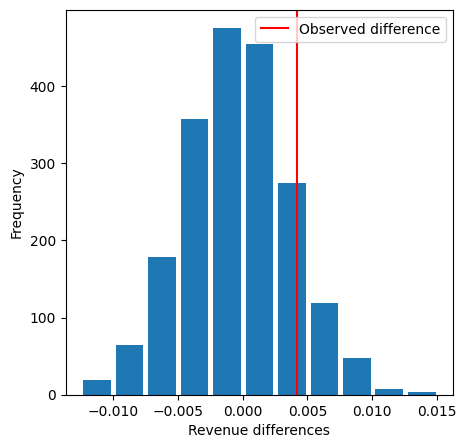

In [120]:
def statistic(x, y, axis):
    return np.mean(x, axis=axis) - np.mean(y, axis=axis)

permutation_results = stats.permutation_test(
    (df_grouped_users[df_grouped_users['VARIANT_NAME'] == 'control']['BOUGHT'], df_grouped_users[df_grouped_users['VARIANT_NAME'] == 'variant']['BOUGHT']),
    statistic,
    vectorized=True,
    n_resamples=2000,    
    alternative='greater'
    )

print(f'p-value: {permutation_results.pvalue:.4f}')

df_results['test_for'] = "Difference in Sales proportions"
df_results['test_type'] = "Permutation Test"
df_results['H0'] = "No difference on Revenue means"
df_results['H1'] = "Mean Revenue on Variant group is lower"
df_results['pvalue'] = mannwhitneyu_results.pvalue
df_results['results'] = "Fail to reject the Null Hypothesis. Seems like there is no difference between Control and Variant groups on Revenue means"


fig, ax = plt.subplots(figsize=(5, 5))
ax.hist(permutation_results.null_distribution, bins=11, rwidth=0.85)
ax.axvline(x = observed_difference, color='red', label='Observed difference')
ax.set_xlabel('Revenue differences')
ax.set_ylabel('Frequency')

ax.legend();
plt.show()

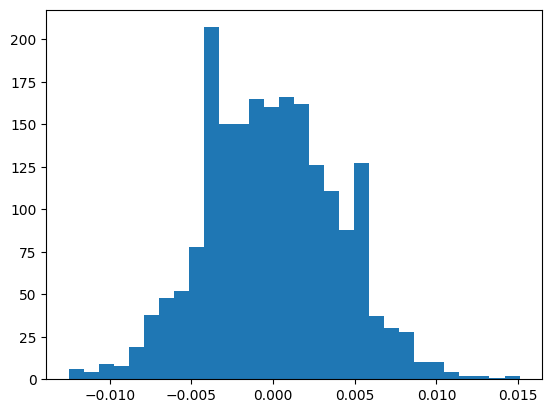

In [121]:
plt.hist(permutation_results.null_distribution, bins =30)
plt.show()

### Z-test

In [125]:
n_boughts = df_contingency['BOUGHT'].values
n_rows = np.array(df_contingency.sum(axis=1)['control'], df_contingency.sum(axis=1)['variant'])
ztest_results = proportions_ztest(count=n_boughts, nobs=n_rows, alternative='larger')
print(f'p-value: {ztest_results[1]:.4f}')


p-value: 0.1488


### Test of independence

We already have sufficient information to make conclusions about the hypotheses stated before. However, for the sake of curiosity and to explore additional tests in this Notebook, we will conduct a test of independence between the variables in the two groups.

Null Hypothesis (H0) = The proportions are independent between the Control and Variant groups (control_proportion - variant_proportion = 0).

Alternative Hypothesis (H1) = The proportions are not independent between the Control and Variant groups (control_proportion != variant_proportion).

### Chi-Square

In [126]:
df_contingency

,NO_BOUGHT,BOUGHT
VARIANT_NAME,,
control,2337,52
variant,2351,42


In [127]:
chi2_results = stats.chi2_contingency(df_contingency)
print(f'p-value: {chi2_results.pvalue:.4f}')

p-value: 0.3443


### Fisher's Exact Test

Because we have very small proportions, it is more appropriate to do a Fisher's Exact test instead of a Chi-Square test.

In [128]:
df_contingency

,NO_BOUGHT,BOUGHT
VARIANT_NAME,,
control,2337,52
variant,2351,42


In [129]:
fisherexact_results = stats.fisher_exact(df_contingency)

print(f'p-value: {fisherexact_results.pvalue:.4f}')

p-value: 0.2997


## Conclusions

We performed different test to reject or fail to reject the null hypotheses on different cases. The results were:

**A/B Testing on Revenue (difference in means)**